# Задача №2. Тестирование последовательностей псевдослучайных чисел.

> Датчики псевдослучайных чисел разрабатываются так, чтобы генерируемые ими
последовательности можно было считать реализациями независимых случайных величин,
равномерно распределённых на единичном отрезке. Ваше задание — реализовать такой
датчик и проверить генерируемую последовательность на равномерность и независимость. 

почему генераторы случайных чисел называются датчиками? потомучто они их дают¿¿¿

# Вариант 4. Степенной остаточный №1, $z_1 = 1237$

> Назначаем начальное число $z_1 < 10000$.
Последующие числа получаем из соотношения $z_i = \left(z_{i-1}^{2.5} \div 100\right) \mod 10000$,
$\div$ — целая часть от деления, $\mod{}$ — остаток от деления.

> Полученная последовательность укладывается в пределы от $0$ до $1$ так:
$x_i = \frac{z_i}{10000}$.

сначало напишем функцию, котороя генерирует следующие число зная предыдущие 

In [56]:
def genNextNumber(prevNumber):
    # мы возводим целое число в дробную степень
    # и даже после // 100 у нас остаётся float
    # поэтому его приходится ручками кастоваать к int-у
    return int(prevNumber**2.5 // 100 % 10000)

нам также, для удобства, понадобится функция, генерирующая сразу $n$ чисел  
также хорошобы чтобы она их нормировала 

In [57]:
def genNumbers(firstNumber, n):
    prevNumber = firstNumber
    res = [firstNumber/10000]
    for i in range(n-1):
        nextNumber = genNextNumber(prevNumber)
        prevNumber = nextNumber
        res.append(nextNumber/10000)
    return res

# Пункт а
а) Рассчитайте 100 псевдослучайных чисел методом, соответствующим вашему варианту.

In [58]:
nums100 = genNumbers(1237, 100)

# Пункт б
б) Приведите первые 10 чисел этой последовательности.

In [59]:
print(nums100[:10])

[0.1237, 0.8175, 0.5381, 0.0145, 0.2531, 0.2777, 0.3868, 0.4995, 0.3508, 0.8681]


# Пункт в
в) Постройте гистограмму с 10 столбцами для полученной последовательности.

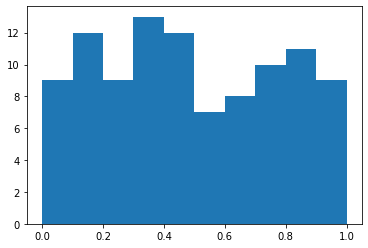

In [60]:
import matplotlib.pyplot as plt

# тут количство столбцов просто передаётся как агрумент
# ещё у нас на практике в 100 числах мин и макс не будут ровно 0.0 и 1.0
# поэтому лучше передать их explicitly
plt.hist(nums100, 10, range=(0, 1))
plt.show()

# Пункт г
г) Проверьте гипотезу о том, что последовательность имеет распределение $R(0,\, 1)$ критерием хи-квадрат,
разбив интервал $[0;\, 1)$ на десять равных интервалов.

Используйте уровень значимости $5\%$.

$$ H_0: \forall i\quad p_i = 0.1 $$
$$ H_1: \exists i\quad p_i \neq 0.1 $$

In [72]:
import numpy as np
from IPython.display import display, Math
from scipy.stats import chi2

def chi2Analyze(nums):
    n = len(nums)
    k = 10
    alpha = .05

    # np.histogram сам разбивает на равные интервалы
    observedValues,_ = np.histogram(nums, bins=k, range=(0, 1))
    expectedValues = [n/k]*k

    chi2val = sum( (observedValues - expectedValues)**2 / expectedValues )
    display(Math(r"\chi^2 = \sum^k_{j=1} \frac{(E_j - O_j)^2}{E_j} = %f" % chi2val))
    display(Math(r"\chi^2_{k-1,\alpha} = %f" % chi2.ppf(1-alpha, k-1) ))

chi2Analyze(nums100)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$\chi^2$ получился меньше $\chi^2_{k-1,\alpha}$ и поэтому мы неможем отвергнуть гипотизу $H_0$

# Пункт д
д) Повторите шаги 3 и 4 для последовательности длиной в 10000 чисел.

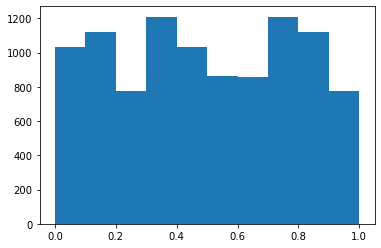

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [73]:
nums10000 = genNumbers(1237, 10000)
plt.hist(nums10000, 10, range=(0, 1))
plt.show()
chi2Analyze(nums10000)

$\chi^2$ получился больше $\chi^2_{k-1,\alpha}$ и поэтому мы можем отвергнуть гипотизу $H_0$ и сказать что наш алгоритм даёт неравномерные случайные числа

# Пункт е
е) Изучите тест перестановок (он описан на третьей странице) и проверьте этим тестом
первые 9999 чисел вашей последовательности, разбив их на тройки.

Используйте уровень значимости $5\%$.

In [84]:
res = {}
for i in range(0, 9999, 3):
    # np.argsort находит за нас ранги
    # но они немного в другом формате, потомучто np.argsort нам говорит как отсортировать масив
    # нам вроде неважно, тк они тоже будут 6 уникальных равноправный категории 
    # но лучше перестраховатся и сделать argsort два раза
    rank = np.argsort(nums10000[i:i+3]).argsort()
    
    # нам надо конвертировать масив в тапл чтобы он мог быть ключём в словарь
    key = tuple(rank)
    if key not in res:
        res[key] = 0
    res[key] += 1

# а теперь такойже хиквадрат как в 4ом пункте
observedValues = np.array(list(res.values()))
n = sum(observedValues)
k = len(observedValues)
expectedValues = [n/k]*k

alpha = .05
chi2val = sum( (observedValues - expectedValues)**2 / expectedValues )
display(Math(r"\chi^2 = \sum^k_{j=1} \frac{(E_j - O_j)^2}{E_j} = %f" % chi2val))
display(Math(r"\chi^2_{k-1,\alpha} = %f" % chi2.ppf(1-alpha, k-1) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$\chi^2$ получился больше $\chi^2_{k-1,\alpha}$ и поэтому мы можем отвергнуть гипотизу $H_0$ и сказать что наш алгоритм даёт неравномерные случайные числа

тест перетановок успешно непройден